MERCEDES-BENZ STOCK PRICE PREDICTION

Import libraries


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn import metrics

import warnings
warnings.filterwarnings('ignore')

Load CSV file

In [2]:
fd=pd.read_csv("/content/MBG.DE.csv")
fd.head(5)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-01-02,41.092484,41.845215,40.971882,41.566578,33.846729,2973654
1,2020-01-03,41.296261,41.362801,40.302322,40.813847,33.233799,4014262
2,2020-01-06,40.202515,40.593433,39.703465,40.593433,33.054317,3441396
3,2020-01-07,40.797215,41.208927,40.680767,40.917816,33.318455,2816618
4,2020-01-08,40.589275,41.167339,40.489468,41.146545,33.504704,2659070


In [ ]:
fd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1105 entries, 0 to 1104
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1105 non-null   object 
 1   Open       1105 non-null   float64
 2   High       1105 non-null   float64
 3   Low        1105 non-null   float64
 4   Close      1105 non-null   float64
 5   Adj Close  1105 non-null   float64
 6   Volume     1105 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 60.6+ KB


In [ ]:
fd.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1105.000000,1105.000000,1105.000000,1105.000000,1105.000000,1.105000e+03
mean,57.601284,58.280954,56.878953,57.592108,52.302903,3.783187e+06
std,14.356715,14.382103,14.309748,14.356889,15.105935,2.648432e+06
min,18.061396,19.225842,17.479174,18.165363,14.791645,0.000000e+00
25%,50.395580,52.060001,49.988022,50.619999,45.035072,2.178624e+06
50%,62.080002,62.730000,61.366329,62.031727,55.401306,3.027640e+06
75%,68.089996,68.650002,67.309998,67.978722,63.179527,4.398045e+06
max,76.940002,77.900002,75.949997,76.610001,76.610001,2.443688e+07


In [ ]:
fd.shape

(1105, 7)

Exploratory Data Analysis (**EDA**)

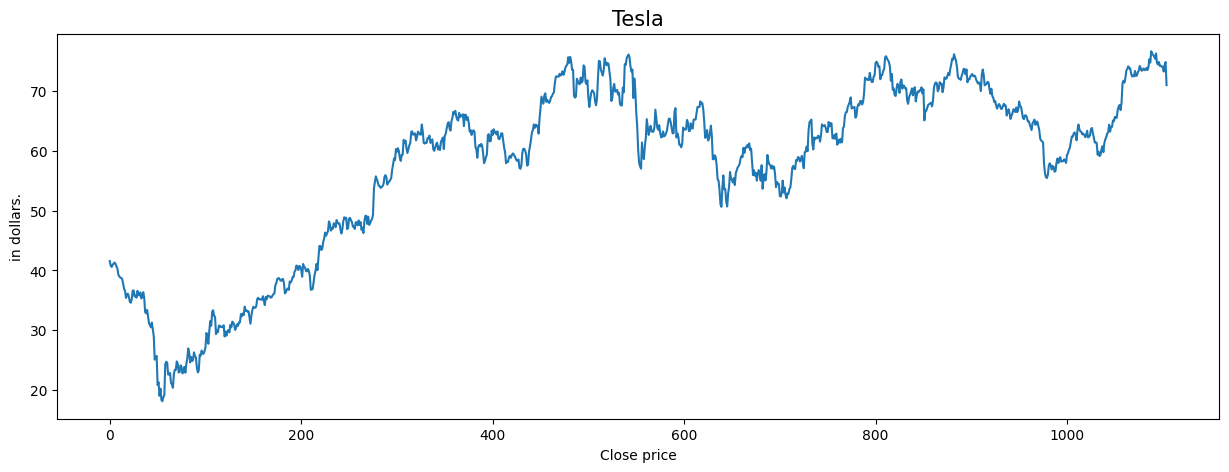

In [30]:
plt.figure(figsize=(15,5))
plt.plot(fd['Close'])
plt.title('Tesla', fontsize=15)
plt.xlabel('Close price')
plt.ylabel('in dollars.')
plt.show()

In [ ]:
fd[fd['Close'] == fd['Adj Close']].shape

(254, 7)

In [ ]:
fd = fd.drop(['Close'],axis=1)
fd.isnull().sum()

,0
Date,0
Open,0
High,0
Low,0
Volume,0


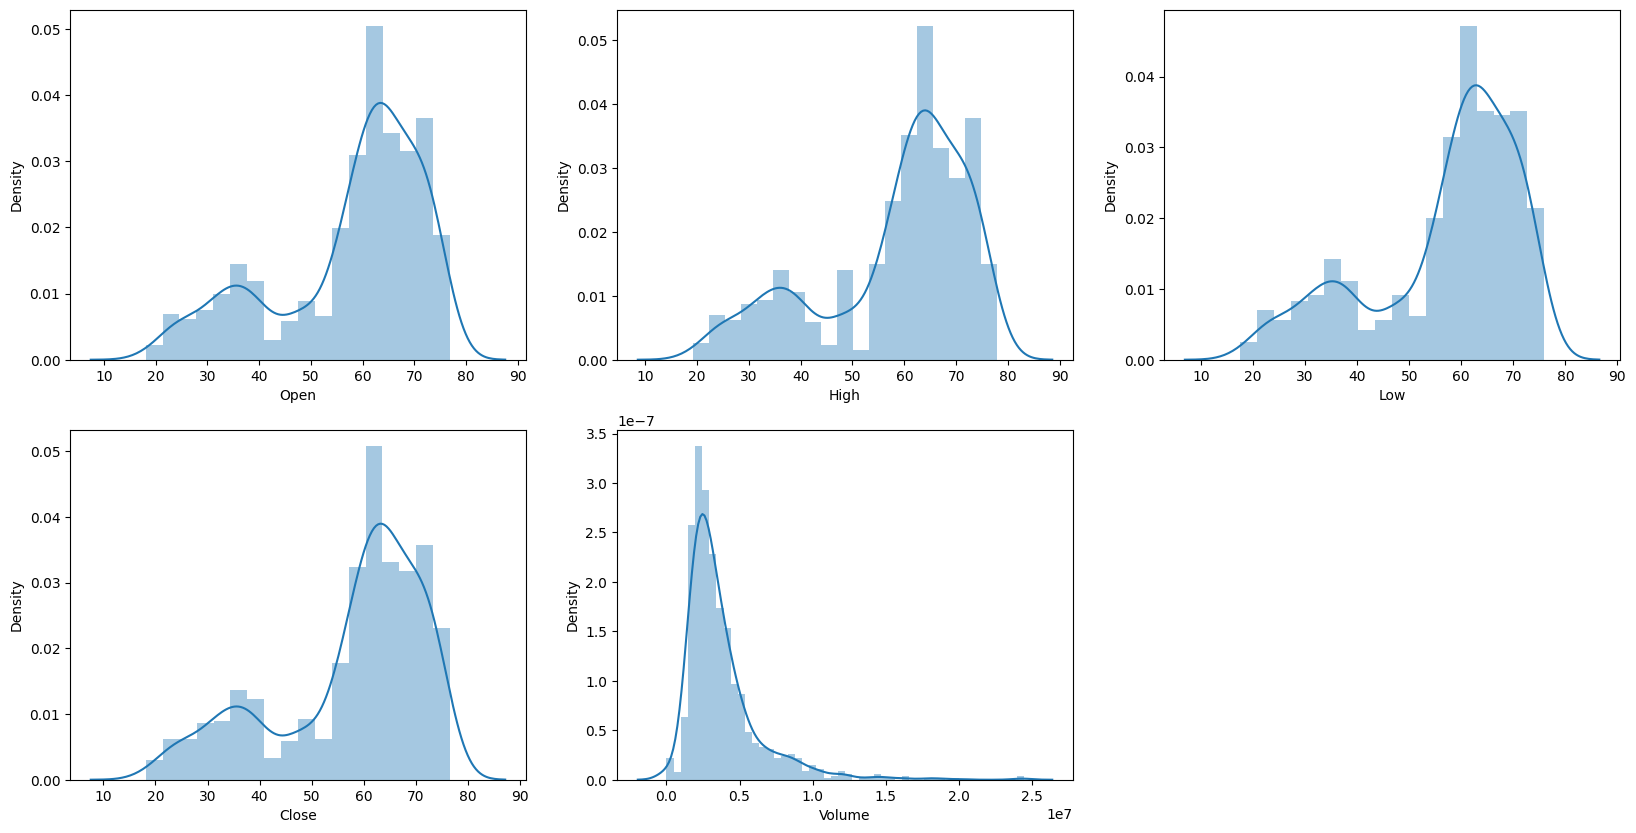

In [ ]:

features = ['Open', 'High', 'Low', 'Close', 'Volume']

plt.subplots(figsize=(20,10))

for i, col in enumerate(features):
  plt.subplot(2,3,i+1)
  sb.distplot(fd[col])
plt.show()

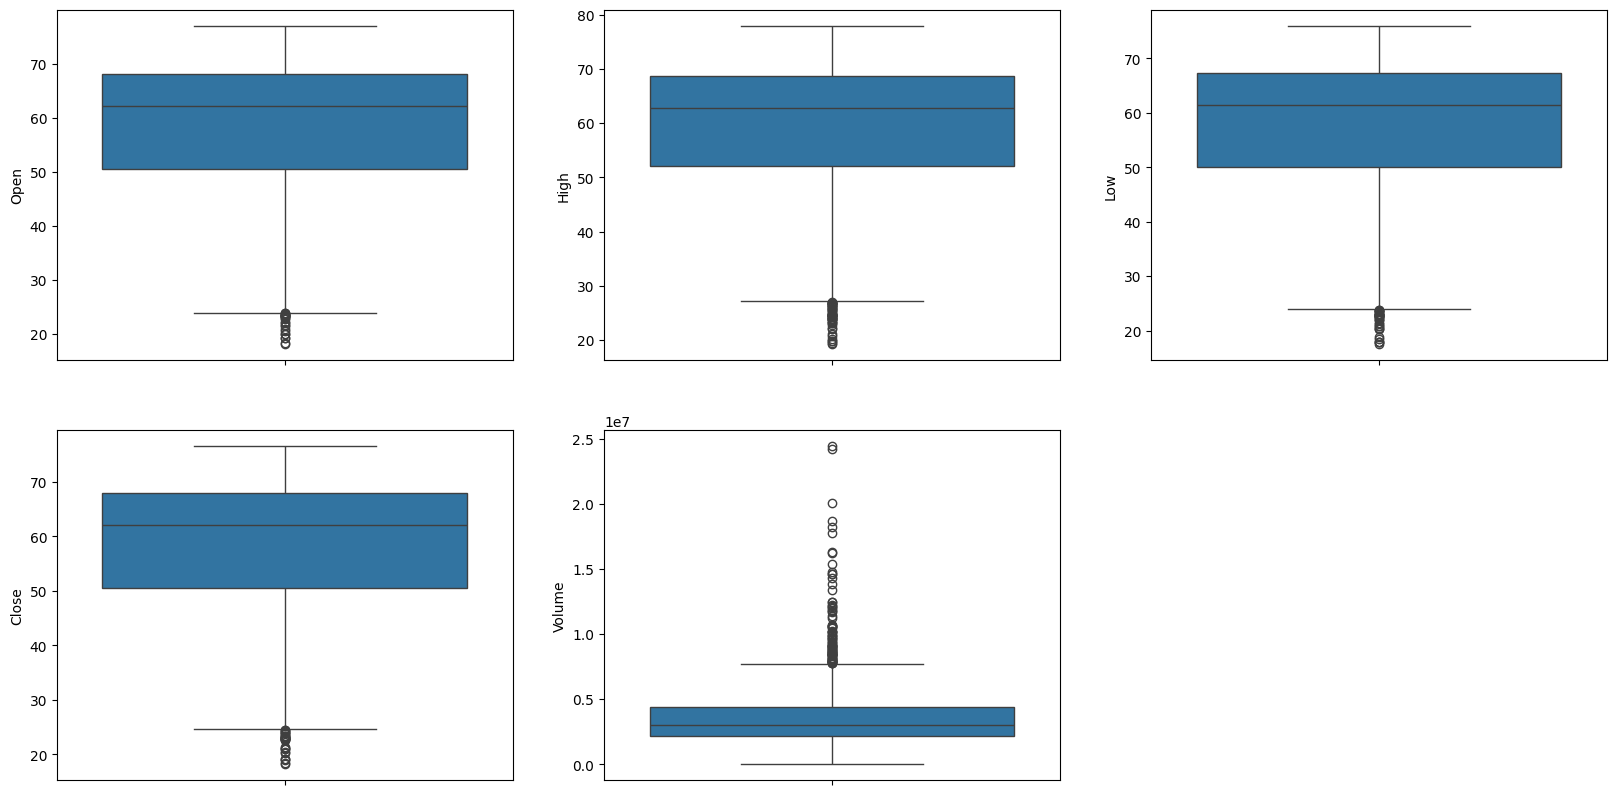

In [ ]:
plt.subplots(figsize=(20,10))
for i, col in enumerate(features):
  plt.subplot(2,3,i+1)
  sb.boxplot(fd[col])
plt.show()


Feature Engineering

In [7]:
splitted = fd['Date'].str.split('/', expand=True)
def normalize_date(date):
    try:
        return pd.to_datetime(date, format='%d/%m/%Y').strftime('%d/%m/%Y')
    except ValueError:
        return pd.to_datetime(date).strftime('%d/%m/%Y')
fd['Date'] = fd['Date'].apply(normalize_date)
fd['Month'] = splitted[1].astype(int)
fd['Year'] = splitted[2].astype(int)

print(fd)

            Date       Open       High        Low      Close  Adj Close  \
0     02/01/2020  41.092484  41.845215  40.971882  41.566578  33.846729   
1     03/01/2020  41.296261  41.362801  40.302322  40.813847  33.233799   
2     06/01/2020  40.202515  40.593433  39.703465  40.593433  33.054317   
3     07/01/2020  40.797215  41.208927  40.680767  40.917816  33.318455   
4     08/01/2020  40.589275  41.167339  40.489468  41.146545  33.504704   
...          ...        ...        ...        ...        ...        ...   
1100  24/04/2024  74.150002  74.440002  73.769997  74.019997  74.019997   
1101  25/04/2024  74.360001  74.360001  72.360001  73.220001  73.220001   
1102  26/04/2024  73.639999  74.790001  73.260002  74.360001  74.360001   
1103  29/04/2024  75.000000  75.279999  74.519997  74.790001  74.790001   
1104  30/04/2024  73.209999  73.790001  70.410004  70.940002  70.940002   

       Volume  Month  Year  
0     2973654      1  2020  
1     4014262      1  2020  
2     344139

In [31]:
fd['Date'] = pd.to_datetime(fd['Date'], errors='coerce')
fd['is_quarter_end'] = np.where(fd['Date'].dt.month.isin([3, 6, 9, 12]) & (fd['Date'].dt.day == 31), 1, 0)
fd.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Month,Year,is_quarter_end,year,open-close,low-high,target
0,2020-02-01,41.092484,41.845215,40.971882,41.566578,33.846729,2973654,1,2020,0,2020.0,-0.474094,-0.873333,0
1,2020-03-01,41.296261,41.362801,40.302322,40.813847,33.233799,4014262,1,2020,0,2020.0,0.482414,-1.060479,0
2,2020-06-01,40.202515,40.593433,39.703465,40.593433,33.054317,3441396,1,2020,0,2020.0,-0.390918,-0.889968,1
3,2020-07-01,40.797215,41.208927,40.680767,40.917816,33.318455,2816618,1,2020,0,2020.0,-0.120601,-0.528160,1
4,2020-08-01,40.589275,41.167339,40.489468,41.146545,33.504704,2659070,1,2020,0,2020.0,-0.557270,-0.677871,1


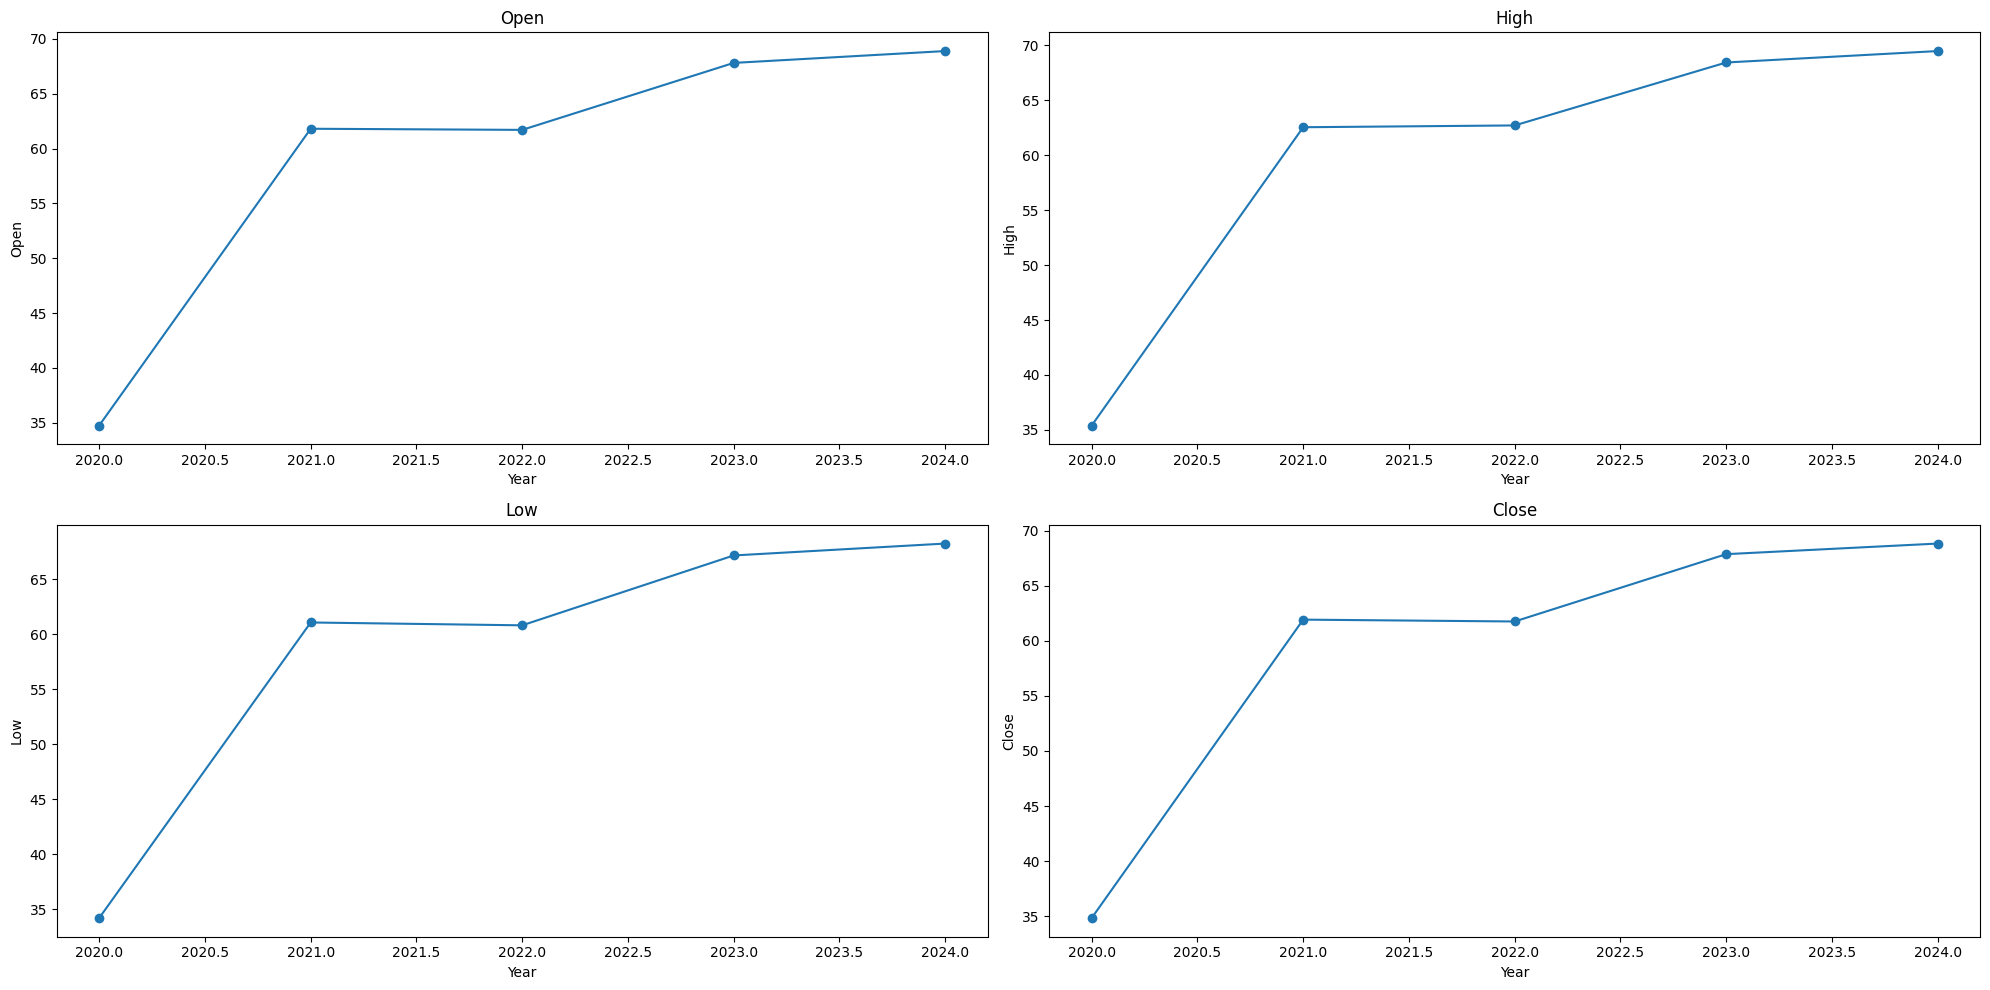

In [15]:
fd['year'] = fd['Date'].dt.year
data_grouped = fd.drop('Date', axis=1).groupby('year').mean()
plt.subplots(figsize=(20, 10))

for i, col in enumerate(['Open', 'High', 'Low', 'Close']):
    plt.subplot(2, 2, i + 1)
    plt.plot(data_grouped.index, data_grouped[col], marker='o')
    plt.title(col)
    plt.xlabel('Year')
    plt.ylabel(col)

plt.tight_layout()
plt.show()

In [17]:
fd.drop('Date', axis=1).groupby('is_quarter_end').mean()


,Open,High,Low,Close,Adj Close,Volume,Month,Year,year
is_quarter_end,,,,,,,,,
0,57.601284,58.280954,56.878953,57.592108,52.302903,3.783187e+06,6.21629,2021.692308,2021.69746


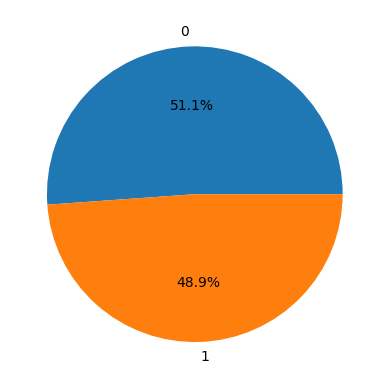

In [20]:
fd['open-close']  = fd['Open'] - fd['Close']
fd['low-high']  = fd['Low'] - fd['High']
fd['target'] = np.where(fd['Close'].shift(-1) > fd['Close'], 1, 0)
plt.pie(fd['target'].value_counts().values,
        labels=[0, 1], autopct='%1.1f%%')
plt.show()


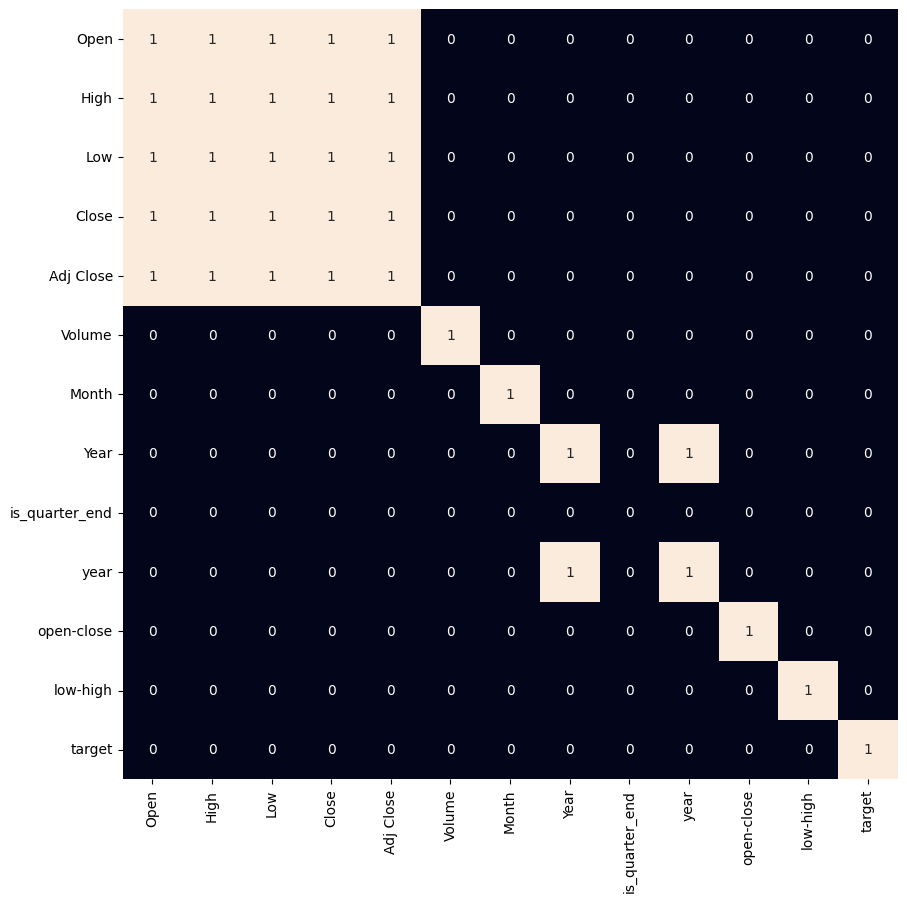

In [21]:
plt.figure(figsize=(10, 10))

sb.heatmap(fd.drop('Date', axis=1).corr() > 0.9, annot=True, cbar=False)
plt.show()

In [22]:
features = fd[['open-close', 'low-high', 'is_quarter_end']]
target = fd['target']

scaler = StandardScaler()
features = scaler.fit_transform(features)

X_train, X_valid, Y_train, Y_valid = train_test_split(
    features, target, test_size=0.1, random_state=2022)
print(X_train.shape, X_valid.shape)


(994, 3) (111, 3)


In [32]:
models = [LogisticRegression(), SVC(
  kernel='poly', probability=True), XGBClassifier()]

for i in range(3):
  models[i].fit(X_train, Y_train)

  print(f'{models[i]} : ')
  print('Training Accuracy : ', metrics.roc_auc_score(
    Y_train, models[i].predict_proba(X_train)[:,1]))
  print('Validation Accuracy : ', metrics.roc_auc_score(
    Y_valid, models[i].predict_proba(X_valid)[:,1]))
  print()


LogisticRegression() : 
Training Accuracy :  0.5016790553541409
Validation Accuracy :  0.5191558441558441

SVC(kernel='poly', probability=True) : 
Training Accuracy :  0.502821380106536
Validation Accuracy :  0.4923701298701299

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...) : 
Training A

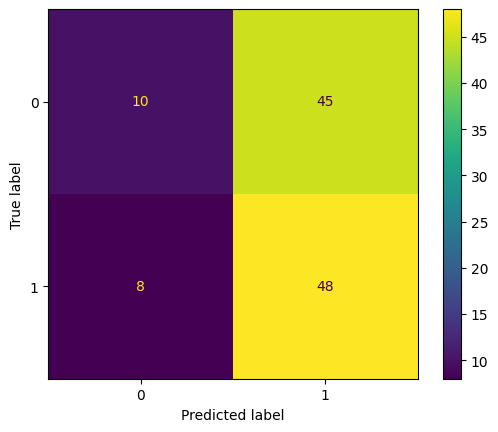

In [24]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_estimator(models[0], X_valid, Y_valid)
plt.show()